In [1]:
import numpy as np
import scipy.constants as cts
import pandas as pd
import matplotlib.pyplot as plt

# Import the baking data


In [2]:
file_path = 'data/Bakelog_Sept_2024.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)



In [3]:
time_col = 'time_full'

# format time column to be a datetime
df['datetime'] = pd.to_datetime(df[time_col], format='%m/%d/%Y %H:%M')

df = df.sort_values(by='datetime')


In [4]:

# read in the relevant data sets
ion_pump_pressure_col = 'ion pump pressure (nTorr)'
turbo_pump_pressure_col = 'turbo pressure (picobar)'

# read in temperature readings
t1 = 't1 (H3/H6)'
t2 = 't2 (H7)'
t3 = 't3 (H3)'
t4 = 't4** (H3/H7/H4)'
t4b = 't4b (H3/H7/H4)'
t5 = 't5 (H3/H7)'
t6 = 't6 (H3/H7/H4)'
t8 = 't8 (DPT)'
t9 = 't9 (H9)'
t10 = 't10 (H8)'
t11 = 't11 (H13)'
t12 = 't12 (H10)'
t13 = 't13 (H11)'
t14 = 't14 (H12)'
t15 = 't15 (H14)'
t17 = 't17 H1(near)'
t17b = 't17b (H1(mid))'
t18 = 't18 (H1(far))'
t19 = 't19 (H4)'
t20 = 't20 (H2)'
t21 = 't21 (H7/H8)'
t22 = 't22 (H4/H5)'
t23 = 't23 (H4/H3(mount))'
t24 = 't24 (H2)'
t25 = 't25 (H5)'
t26 = 't26 (H4/H5)'
t27 = 't27 (H2/H3)'
t28 = 't28 (H1/H2)'
t30 = 't30 (H6)'

# read in heater settings
H1 = 'H1'
H2 = 'H2'
H3 = 'H3'
H4 = 'H4'
H5 = 'H5(V)'
H6 = 'H6(V)'
H7 = 'H7'
H8 = 'H8'
H9 = 'H9'
H10 = 'H10'
H11 = 'H11'
H12 = 'H12'
H13 = 'H13(%)'
H14 = 'H14(V)'

In [5]:
#filtered_df = df
ion_filtered_df = df.dropna(subset=[ion_pump_pressure_col])# Select the rows starting from the first valid index

# filtered_df = df.loc[first_valid_index:]
ion_filtered_df = ion_filtered_df[[time_col, ion_pump_pressure_col]]  # Select only the 'time' and 'ion pump pressure' columns


# Input start time of plotting

In [6]:
time_col = 'datetime'
# Define the start time point
start_time = pd.to_datetime('2024-09-07 12:40', format='%Y-%m-%d %H:%M')

# Filter the DataFrame
df = df[df['datetime'] >= start_time]

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_shit(df, xcol, ycol, title, ylabel, xlabel, filename):
    sns.set(style="whitegrid")
    
    sns.lineplot(data=df, x=xcol, y=ycol, marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    # Set additional x-ticks
    xticks = pd.date_range(start=df[xcol].min(), end=df[xcol].max(), freq='12H')
    plt.xticks(ticks=xticks, rotation=90)

    plt.savefig(f'{filename}.png', bbox_inches='tight')
    plt.show()
    sns.set(style="whitegrid")

In [8]:
df['datetime']

60    2024-09-07 12:40:00
61    2024-09-07 15:50:00
62    2024-09-08 09:15:00
63    2024-09-08 13:35:00
64    2024-09-09 08:30:00
65    2024-09-09 14:20:00
66    2024-09-09 18:20:00
67    2024-09-10 12:50:00
68    2024-09-10 16:45:00
69    2024-09-11 08:40:00
70    2024-09-11 18:30:00
71    2024-09-12 08:35:00
72    2024-09-12 13:25:00
73    2024-09-12 15:40:00
74    2024-09-12 17:20:00
75    2024-09-13 08:50:00
76    2024-09-13 11:45:00
77    2024-09-13 13:45:00
78    2024-09-13 14:30:00
79    2024-09-13 15:30:00
80    2024-09-13 17:00:00
81    2024-09-13 18:00:00
82    2024-09-14 10:05:00
83    2024-09-15 12:05:00
84    2024-09-16 08:25:00
85    2024-09-16 13:05:00
86    2024-09-16 15:00:00
87    2024-09-16 15:40:00
88    2024-09-16 16:00:00
89    2024-09-16 16:25:00
90    2024-09-16 16:55:00
91    2024-09-16 17:25:00
92    2024-09-16 17:45:00
93    2024-09-16 18:00:00
94    2024-09-16 18:16:00
95    2024-09-16 18:36:00
96    2024-09-16 18:50:00
97    2024-09-17 09:00:00
98    2024-0

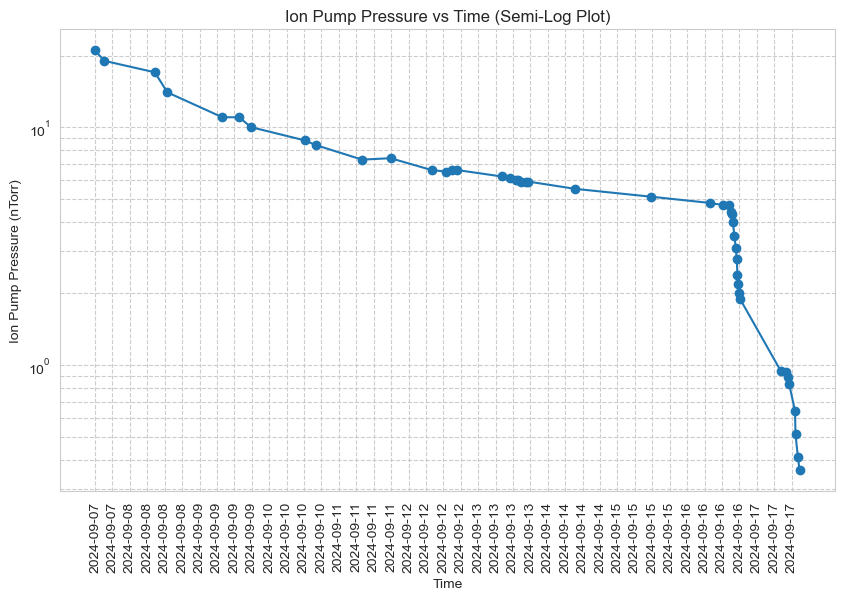

In [9]:

plt.figure(figsize=(10, 6))
plt.semilogy(df['datetime'], df[ion_pump_pressure_col], marker='o')

# Customize the plot
plt.xlabel('Time')
plt.ylabel('Ion Pump Pressure (nTorr)')
plt.title('Ion Pump Pressure vs Time (Semi-Log Plot)')
plt.grid(True, which="both", ls="--")

# Set additional x-ticks at 12-hour intervals
xticks = pd.date_range(start=df['datetime'].min(), end=df['datetime'].max(), freq='6H')
plt.xticks(ticks=xticks, rotation=90)

# Save the plot to a file with tight bounding box
plt.savefig('ion_pump_pressure_semi_log_plot.png', bbox_inches='tight')

# Display the plot
plt.show()

In [174]:
 df[ion_pump_pressure_col]

60     21.00
61     19.00
62     17.00
63     14.00
64     11.00
65     11.00
66     10.00
67      8.80
68      8.40
69      7.30
70      7.40
71      6.60
72      6.50
73      6.60
74      6.60
75      6.20
76      6.10
77      6.00
78      6.00
79      5.90
80      5.90
81      5.90
82      5.50
83      5.10
84      4.80
85      4.70
86      4.70
87      4.40
88      4.30
89      4.00
90      3.50
91      3.10
92      2.80
93      2.40
94      2.20
95      2.00
96      1.90
97      0.94
98      0.93
99      0.89
100     0.83
101     0.64
102     0.51
103     0.41
Name: ion pump pressure (nTorr), dtype: float64

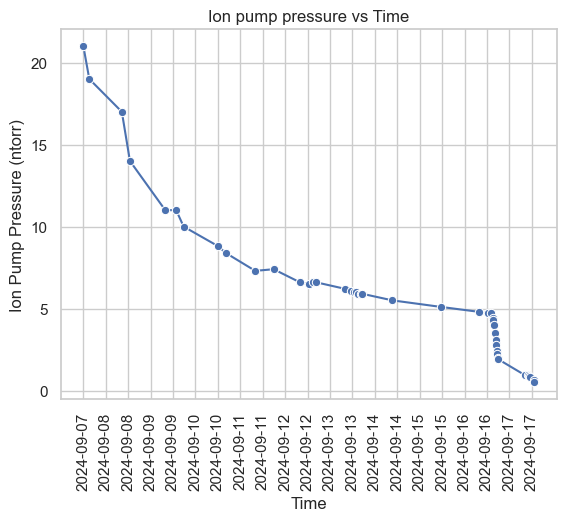

In [160]:
plot_shit(df, time_col, ion_pump_pressure_col,'Ion pump pressure vs Time', 'Ion Pump Pressure (ntorr)','Time', 'ion output')

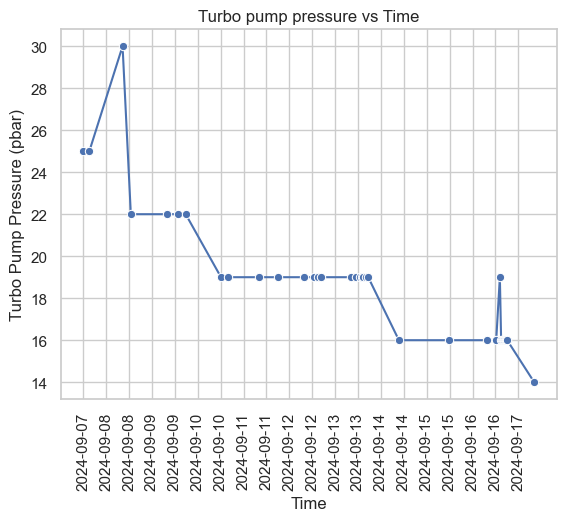

In [112]:
plot_shit(df, time_col, turbo_pump_pressure_col,'Turbo pump pressure vs Time', 'Turbo Pump Pressure (pbar)','Time', 'turbo_output')

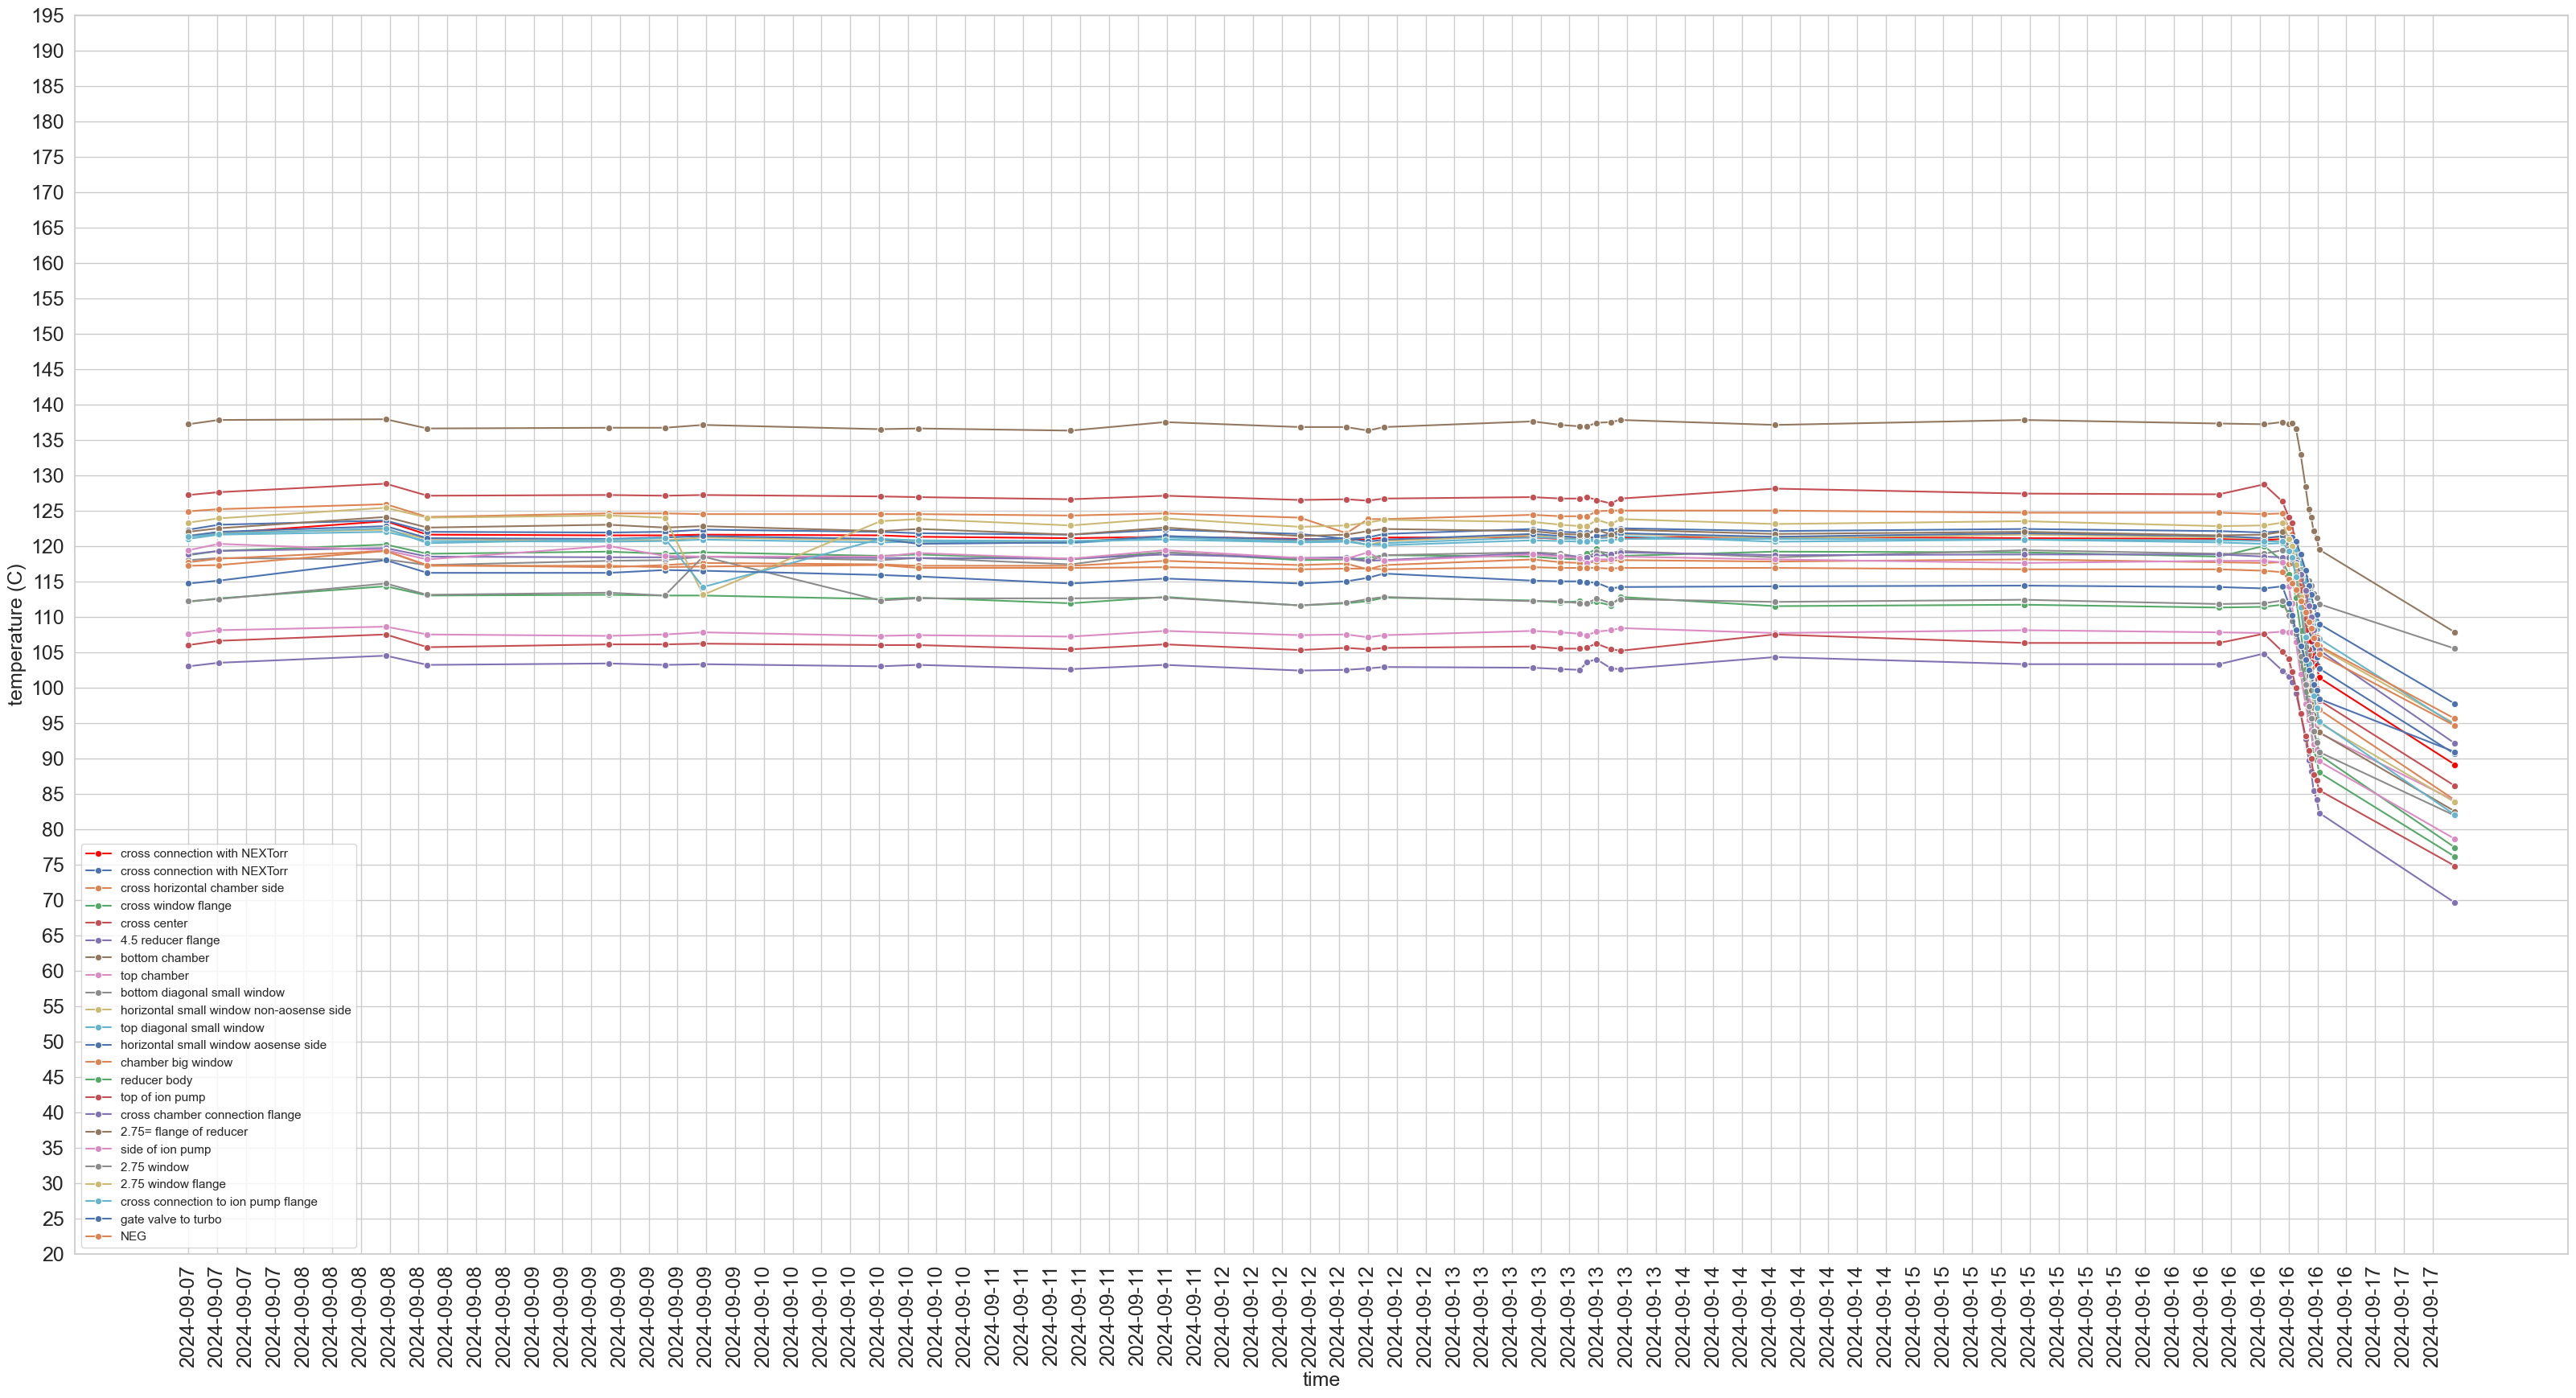

In [113]:
###### filename = "temps11"
sns.set(style="whitegrid")
plt.figure(figsize=(40, 20))
    
sns.lineplot(data=df, x=time_col, y=t1, marker='o',color='red', label="cross connection with NEXTorr")
sns.lineplot(data=df, x=time_col, y=t2, marker='o',label="cross connection with NEXTorr")
sns.lineplot(data=df, x=time_col, y=t3, marker='o',label="cross horizontal chamber side")
sns.lineplot(data=df, x=time_col, y=t4b, marker='o', label= "cross window flange")
sns.lineplot(data=df, x=time_col, y=t5, marker='o',label="cross center")
sns.lineplot(data=df, x=time_col, y=t6, marker='o', label="4.5 reducer flange")
#sns.lineplot(data=df, x=time_col, y=t8, marker='o',label="DPT")
sns.lineplot(data=df, x=time_col, y=t9, marker='o',label="bottom chamber")
sns.lineplot(data=df, x=time_col, y=t10, marker='o',label="top chamber")
sns.lineplot(data=df, x=time_col, y=t11, marker='o',label="bottom diagonal small window")
sns.lineplot(data=df, x=time_col, y=t12, marker='o',label="horizontal small window non-aosense side",)
sns.lineplot(data=df, x=time_col, y=t13, marker='o',label="top diagonal small window")
sns.lineplot(data=df, x=time_col, y=t14, marker='o',label="horizontal small window aosense side")
sns.lineplot(data=df, x=time_col, y=t15, marker='o',label="chamber big window")
#sns.lineplot(data=df, x=time_col, y=t17, marker='o')
#sns.lineplot(data=df, x=time_col, y=t17b, marker='o')
#sns.lineplot(data=df, x=time_col, y=t18, marker='o')
sns.lineplot(data=df, x=time_col, y=t19, marker='o',label="reducer body")
sns.lineplot(data=df, x=time_col, y=t20, marker='o',label="top of ion pump")
sns.lineplot(data=df, x=time_col, y=t21, marker='o',label = "cross chamber connection flange")
sns.lineplot(data=df, x=time_col, y=t22, marker='o',label="2.75= flange of reducer")
#sns.lineplot(data=df, x=time_col, y=t23, marker='o')
sns.lineplot(data=df, x=time_col, y=t24, marker='o',label="side of ion pump")
sns.lineplot(data=df, x=time_col, y=t25, marker='o',label="2.75 window")
sns.lineplot(data=df, x=time_col, y=t26, marker='o',label="2.75 window flange")
sns.lineplot(data=df, x=time_col, y=t27, marker='o',label="cross connection to ion pump flange")
sns.lineplot(data=df, x=time_col, y=t28, marker='o',label="gate valve to turbo")
sns.lineplot(data=df, x=time_col, y=t30, marker='o',label="NEG")

plt.xlabel("time",fontsize =18)
plt.ylabel("temperature (C)",fontsize =18)

plt.grid(True)
# Set additional x-ticks

# frequency of ticks every 3 hours
xticks = pd.date_range(start=df[time_col].min(), end=df[time_col].max(), freq='3H')
plt.xticks(ticks=xticks, rotation=90,fontsize=18)
plt.yticks(ticks=np.arange(20,200,5),fontsize =18)

#plt.savefig(f'{filename}.png', bbox_inches='tight')
plt.show()

sns.set(style="whitegrid")

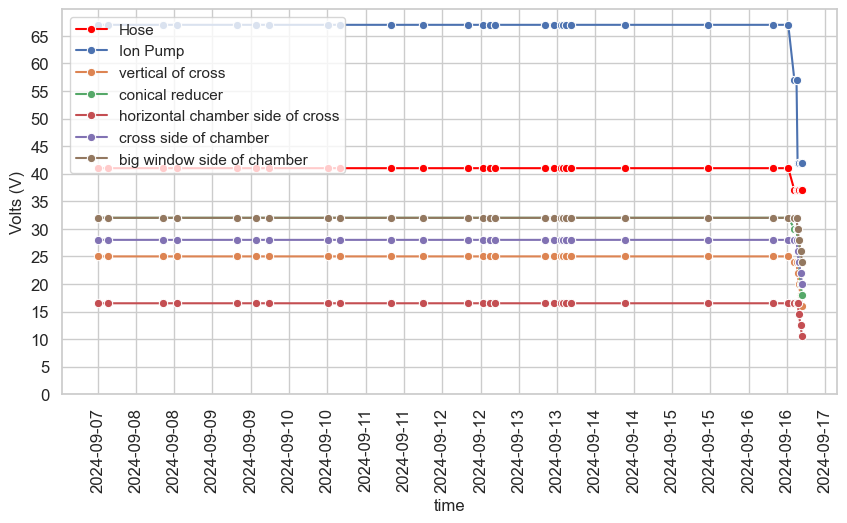

In [114]:
filename = "temps11"
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
    
sns.lineplot(data=df, x=time_col, y=H1, marker='o',color='red', label="Hose")
sns.lineplot(data=df, x=time_col, y=H2, marker='o',label="Ion Pump")
sns.lineplot(data=df, x=time_col, y=H3, marker='o',label="vertical of cross")
sns.lineplot(data=df, x=time_col, y=H4, marker='o', label= "conical reducer")
#sns.lineplot(data=df, x=time_col, y=H5, marker='o',label="cross center")
#sns.lineplot(data=df, x=time_col, y=H6, marker='o', label="4.5 reducer flange")
sns.lineplot(data=df, x=time_col, y=H7, marker='o',label="horizontal chamber side of cross")
sns.lineplot(data=df, x=time_col, y=H8, marker='o',label="cross side of chamber")
sns.lineplot(data=df, x=time_col, y=H9, marker='o',label="big window side of chamber")
#sns.lineplot(data=df, x=time_col, y=H10, marker='o',label="Horizontal viewport on the non-aosense side")
#sns.lineplot(data=df, x=time_col, y=H11, marker='o',label="Top viewport on the non-aosense side",)
#sns.lineplot(data=df, x=time_col, y=H12, marker='o',label="Horizontal window on the aosense side")
#sns.lineplot(data=df, x=time_col, y=H13, marker='o',label="Bottom viewport on the aosense side")
#sns.lineplot(data=df, x=time_col, y= H14, marker='o',label="chamber big window")


plt.xlabel("time",fontsize =12)
plt.ylabel("Volts (V)",fontsize =12)

plt.grid(True)
# Set additional x-ticks

# frequency of ticks every 3 hours
xticks = pd.date_range(start=df[time_col].min(), end=df[time_col].max(), freq='12H')
plt.xticks(ticks=xticks, rotation=90,fontsize=12)
plt.yticks(ticks=np.arange(0,70,5),fontsize =12)

plt.savefig(f'{filename}.png', bbox_inches='tight')
plt.show()

sns.set(style="whitegrid")